In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
eps = np.finfo(float).eps
tiny = 100*eps

In [2]:
t0 = 0.
tf = 6.
x0 = 100.
def x(t):
    return 1675/21.*np.exp(-8*t)+320/21.*np.exp(-t/8.)+5.
def xp(t,x):
    return -8*x+40*(3*np.exp(-t/8.)+1)
def xpx(t,x):
    return -8

** Forward Euler **

In [3]:
def forward_euler(t0,tf,x0,h,xp):
    ts = [t0]
    xs = [x0]
    N = int((tf - t0)/h)
    for i in range(N):
        x0 += h*xp(t0,x0)
        t0 += h
        ts = np.append(ts,t0)
        xs = np.append(xs,x0)
    return ts, xs

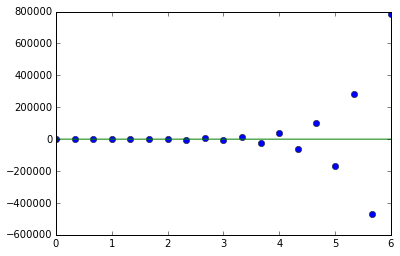

In [4]:
ts, xs = forward_euler(t0,tf,x0,1/3.,xp)
plt.plot(ts,xs,'o',ts,x(ts))

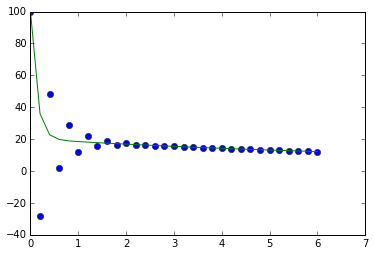

In [5]:
ts, xs = forward_euler(t0,tf,x0,1/5.,xp)
plt.plot(ts,xs,'o',ts,x(ts))

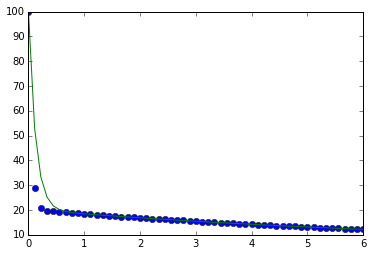

In [6]:
ts, xs = forward_euler(t0,tf,x0,1/9.,xp)
plt.plot(ts,xs,'o',ts,x(ts))

** Backward Euler **

In [7]:
def backward_euler(t0,tf,x0,h,xp,xpx):
    ts = [t0]
    xs = [x0]
    N = int((tf - t0)/h)
    for i in range(N):
        def root(guess):
            return guess - x0 - h*xp(t0+h,guess)
        def rootp(guess):
            return 1 - h*xpx(t0+h, guess)
        count = 1 
        guess = x0
        while np.abs(root(guess)) > tiny:                           # Newton's Method
            guess = guess - root(guess)/rootp(guess)
            count += 1
            if np.abs(rootp(guess)) < tiny:
                print 'Derivative is vanishing'
                break
            if count == 100:
                print 'does not converge'
                break
        x0 = guess
        t0 += h
        ts = np.append(ts,t0)
        xs = np.append(xs,x0)
    return ts, xs

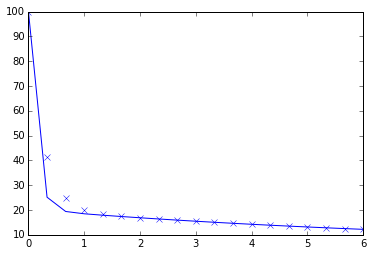

In [8]:
ts, xs = backward_euler(t0,tf,x0,1/3.,xp,xpx)
plt.plot(ts,xs,'bx',ts,x(ts))

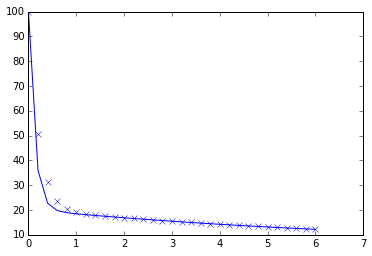

In [9]:
ts, xs = backward_euler(t0,tf,x0,1/5.,xp,xpx)
plt.plot(ts,xs,'bx',ts,x(ts))

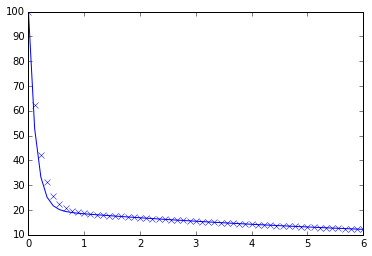

In [10]:
ts, xs = backward_euler(t0,tf,x0,1/9.,xp,xpx)
plt.plot(ts,xs,'bx',ts,x(ts))